In [125]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [126]:
df = pd.read_csv('NYC_Restaurants.csv', dtype=unicode)
df.columns.values

array(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET',
       'ZIPCODE', 'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE',
       'ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION',
       'CRITICAL FLAG', 'SCORE', 'GRADE', 'GRADE DATE', 'RECORD DATE',
       'INSPECTION TYPE'], dtype=object)

## **Q1. Create a unique name for each restaurant.**

_Make a copy of the dataframe. Create a new column called 'RESTAURANT' by concetenating DBA, BUILDING, STREET, ZIPCODE_

In [127]:
df_copy = df.copy()
df_copy['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + ' ' + df['STREET'] + ' ' + df['ZIPCODE']

In [128]:
df_copy['RESTAURANT'].head(10)

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

## **Q2. How many restaurants are included in the data?**

_use DataFrame.nunique() to find all unique values of RESTAURANT in our df copy, then count them. This should work because RESTAURANT should have a unique value for each separate restaurant (since it's a concatenation of the restaurant name and address)_

In [129]:
df_copy['RESTAURANT'].nunique()

10114

## **Q3. How many chains are there?**

_Make a column of unique addresses. Create a new dataframe with columns unique address and DBA, dropping missing and duplicate values. Mask that new dataframe by only those whose DBAs show up more than once (you have to set the dataframe's index to DBA for this to work). Group by the DBAs, and get the length of the grouped values._

In [130]:
df_uniqueAddresses = df.copy()
df_uniqueAddresses['UNIQUE ADDRESS'] = df['BUILDING'] + ' ' + df['STREET'] + ' ' + df['ZIPCODE'] + ' ' + df['BORO']

In [131]:
df_uniqueAddresses['UNIQUE ADDRESS'].head(10)

0     469 FLATBUSH AVENUE 11225 BROOKLYN
1     469 FLATBUSH AVENUE 11225 BROOKLYN
2     469 FLATBUSH AVENUE 11225 BROOKLYN
3     469 FLATBUSH AVENUE 11225 BROOKLYN
4     469 FLATBUSH AVENUE 11225 BROOKLYN
5             97-22 63 ROAD 11374 QUEENS
6             97-22 63 ROAD 11374 QUEENS
7             97-22 63 ROAD 11374 QUEENS
8             97-22 63 ROAD 11374 QUEENS
9    8825 ASTORIA BOULEVARD 11369 QUEENS
Name: UNIQUE ADDRESS, dtype: object

In [132]:
df_restaurantLocs = df_uniqueAddresses[['UNIQUE ADDRESS', 'DBA']]
df_restaurantLocs.dropna()
df_restaurantLocs = df_restaurantLocs.drop_duplicates()
df_restaurantLocs.head()

,UNIQUE ADDRESS,DBA
0,469 FLATBUSH AVENUE 11225 BROOKLYN,WENDY'S
5,97-22 63 ROAD 11374 QUEENS,TOV KOSHER KITCHEN
9,8825 ASTORIA BOULEVARD 11369 QUEENS,BRUNOS ON THE BOULEVARD
16,1269 SUTTER AVENUE 11208 BROOKLYN,MAY MAY KITCHEN
22,705 KINGS HIGHWAY 11223 BROOKLYN,SEUDA FOODS


In [133]:
mask = df_restaurantLocs['DBA'].value_counts() > 1
chains = df_restaurantLocs.set_index('DBA')[(df_restaurantLocs['DBA'].value_counts() > 1)]
chains.groupby('DBA').count().head()

C:\Users\jeile\Anaconda3\envs\chakra\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,UNIQUE ADDRESS
DBA,
16 HANDLES,3
2 BROS PIZZA,7
ABITINO'S PIZZA,3
ALFONSO'S PASTRY SHOPPE,2
AMAZE,2


In [138]:
len(chains.groupby('DBA'))

368

## **Q4. Plot a bar graph of the top 20 most popular chains.**

_use our previously created chains, group by the DBA and count and sort the count values in descending order. plot the top 20._

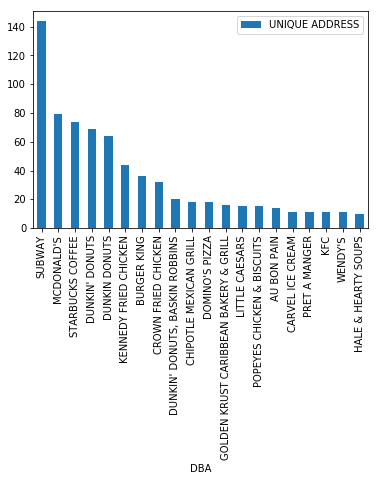

In [135]:
chain_count = chains.groupby('DBA').count().sort_values(by='UNIQUE ADDRESS', ascending=False)
chain_count[:20].plot(kind='bar')

## **Q5. What fraction of all restaurants are chains?**

_Use the value of all unique restaurants from Q2. Find the total number of chain restaurants by taking the length of the chains dataframe we made in Q3. Divide._

In [154]:
len(chains) / (df_copy['RESTAURANT'].nunique() * 1.0)      # make sure you use floats :(

0.16472216729286138

## **Q6. Plot the number of non-chain restaurants in each boro.**

_Apply the opposite mask from the one that yielded chains to the restaurantLocs dataframe._

## **Q7. Plot the _fraction_ of non-chain restaurants in each boro.**

_DESCRIPTION DESCRIPTION BLAH_

## **Q8. Plot the popularity of cuisines.**

_DESCRIPTION DESCRIPTION BLAH_

## **Q9. Plot the cuisines among restaurants which do not get cited for violations.**

_DESCRIPTION DESCRIPTION BLAH_

## **Q10. What cuisines tend to be the “cleanest”?**

_DESCRIPTION DESCRIPTION BLAH_

## **Q11. What are the most common violations in each borough?**

_DESCRIPTION DESCRIPTION BLAH_

## **Q12. What are the most common violations per borough, after normalizing for the relative abundance of each violation?**

_DESCRIPTION DESCRIPTION BLAH_